# Data Manipulation

It is impossible to get anything done if we cannot manipulate data. Generally, there are two important things we need to do with data: (i) acquire it and (ii) process it once it is inside the computer. There is no point in acquiring data if we do not even know how to store it, so let's get our hands dirty first by playing with synthetic data. We will start by introducing the tensor,
PyTorch's primary tool for storing and transforming data. If you have worked with NumPy before, you will notice that tensors are, by design, similar to NumPy's multi-dimensional array. Tensors support asynchronous computation on CPU, GPU and provide support for automatic differentiation.

## Getting Started

In [0]:
import torch

Tensors represent (possibly multi-dimensional) arrays of numerical values.
The simplest object we can create is a vector. To start, we can use `arange` to create a row vector with 12 consecutive integers.

In [0]:
x = torch.arange(12, dtype=torch.float64)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
       dtype=torch.float64)

In [0]:
# We can get the tensor shape through the shape attribute.
x.shape

torch.Size([12])

In [0]:
# .shape is an alias for .size(), and was added to more closely match numpy
x.size()

torch.Size([12])

We use the `reshape` function to change the shape of one (possibly multi-dimensional) array, to another that contains the same number of elements.
For example, we can transform the shape of our line vector `x` to (3, 4), which contains the same values but interprets them as a matrix containing 3 rows and 4 columns. Note that although the shape has changed, the elements in `x` have not.

In [0]:
x = x.reshape((3, 4))
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

Reshaping by manually specifying each of the dimensions can get annoying. Once we know one of the dimensions, why should we have to perform the division our selves to determine the other? For example, above, to get a matrix with 3 rows, we had to specify that it should have 4 columns (to account for the 12 elements). Fortunately, PyTorch can automatically work out one dimension given the other.
We can invoke this capability by placing `-1` for the dimension that we would like PyTorch to automatically infer. In our case, instead of
`x.reshape((3, 4))`, we could have equivalently used `x.reshape((-1, 4))` or `x.reshape((3, -1))`.

In [0]:
torch.FloatTensor(2, 3)

tensor([[3.0218e-35, 0.0000e+00, 3.7835e-44],
        [0.0000e+00,        nan, 0.0000e+00]])

In [0]:
torch.Tensor(2, 3)

tensor([[3.0218e-35, 0.0000e+00, 8.4078e-45],
        [0.0000e+00, 1.4013e-45, 0.0000e+00]])

In [0]:
torch.empty(2, 3)

tensor([[3.0218e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00]])

torch.Tensor() is just an alias to torch.FloatTensor() which is the default type of tensor, when no dtype is specified during tensor construction.

From the torch for numpy users notes, it seems that torch.Tensor() is a drop-in replacement of numpy.empty()

So, in essence torch.FloatTensor() and torch.empty() does the same job.

The `empty` method just grabs some memory and hands us back a matrix without setting the values of any of its entries. This is very efficient but it means that the entries might take any arbitrary values, including very big ones! Typically, we'll want our matrices initialized either with ones, zeros, some known constant or numbers randomly sampled from a known distribution.

Perhaps most often, we want an array of all zeros. To create tensor with all elements set to 0 and a shape of (2, 3, 4) we can invoke:

In [0]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

We can create tensors with each element set to 1 works via

In [0]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

We can also specify the value of each element in the desired NDArray by supplying a Python list containing the numerical values.

In [0]:
y = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
y

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

**Exercise:** In some cases, we will want to randomly sample the values of each element in the tensor according to some known probability distribution. This is especially common when we intend to use the tensor as a parameter in a neural network. The following function should create a tensor with a shape of (3,4). Each of its elements is randomly sampled in a normal distribution with zero mean and unit variance. Fill out the following function using torch


In [0]:
def rand_matrix(rows=3, cols=4):
  ## write your code below 
  return torch.normal(0,1,size= (3,4))
  ## end of function

#print (torch.normal(0,1,size= (3,4)))

## Operations

Oftentimes, we want to apply functions to arrays. Some of the simplest and most useful functions are the element-wise functions. These operate by performing a single scalar operation on the corresponding elements of two arrays. We can create an element-wise function from any function that maps from the scalars to the scalars. In math notations we would denote such a function as $f: \mathbb{R} \rightarrow \mathbb{R}$. Given any two vectors $\mathbf{u}$ and $\mathbf{v}$ *of the same shape*, and the function f,
we can produce a vector $\mathbf{c} = F(\mathbf{u},\mathbf{v})$ by setting $c_i \gets f(u_i, v_i)$ for all $i$. Here, we produced the vector-valued $F: \mathbb{R}^d \rightarrow \mathbb{R}^d$ by *lifting* the scalar function to an element-wise vector operation. In PyTorch, the common standard arithmetic operators (+,-,/,\*,\*\*) have all been *lifted* to element-wise operations for identically-shaped tensors of arbitrary shape. We can call element-wise operations on any two tensors of the same shape, including matrices.

In [0]:
x = torch.tensor([1, 2, 4, 8], dtype=torch.float32)
y = torch.ones_like(x) * 2
print('x =', x)
print('y =', y)
print('x + y', x + y)
print('x - y', x - y)
print('x * y', x * y)
print('x / y', x / y)

x = tensor([1., 2., 4., 8.])
y = tensor([2., 2., 2., 2.])
x + y tensor([ 3.,  4.,  6., 10.])
x - y tensor([-1.,  0.,  2.,  6.])
x * y tensor([ 2.,  4.,  8., 16.])
x / y tensor([0.5000, 1.0000, 2.0000, 4.0000])


Many more operations can be applied element-wise, such as exponentiation:

In [0]:
torch.exp(x)
# Note: torch.exp is not implemented for 'torch.LongTensor'.

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In addition to computations by element, we can also perform matrix operations, like matrix multiplication using the `mm` or `matmul` function. Next, we will perform matrix multiplication of `x` and the transpose of `y`. We define `x` as a matrix of 3 rows and 4 columns, and `y` is transposed into a matrix of 4 rows and 3 columns. The two matrices are multiplied to obtain a matrix of 3 rows and 3 columns.

In [0]:
x = torch.arange(12, dtype=torch.float32).reshape((3,4))
y = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]], dtype=torch.float32)
print(x.dtype)
print(y)
torch.mm(x, y.t())

torch.float32
tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])


tensor([[ 18.,  20.,  10.],
        [ 58.,  60.,  50.],
        [ 98., 100.,  90.]])

Note that torch.dot() behaves differently to np.dot(). There's been some discussion about what would be desirable here. Specifically, torch.dot() treats both a and b as 1D vectors (irrespective of their original shape) and computes their inner product. 

**Exercise:** We can also merge multiple tensors. For that, we need to tell torch along which dimension to merge. For instance, we can merge two matrices (tensors) along dimension 0 (along rows) and dimension 1 (along columns). Write a function that does that using torch.

In [0]:
def merge_tensors(x, y, dim):
  ## write your code below
  return torch.cat((x,y),dim)
  ## end of function

Sometimes, we may want to construct binary tensors via logical statements. Take `x == y` as an example. If `x` and `y` are equal for some entry, the new tensor has a value of 1 at the same position; otherwise it is 0.

In [0]:
x == y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

Summing all the elements in the tensor yields an tensor with only one element.

In [0]:
x.sum()

tensor(66.)

We can transform the result into a scalar in Python using the `asscalar` function of `numpy`. In the following example, the $\ell_2$ norm of `x` yields a single element tensor. The final result is transformed into a scalar.

In [0]:
import numpy as np
np.asscalar(x.norm())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


22.494443893432617

## Broadcast Mechanism

In the above section, we saw how to perform operations on two tensors of the same shape. When their shapes differ, a broadcasting mechanism may be triggered analogous to NumPy: first, copy the elements appropriately so that the two tensors have the same shape, and then carry out operations by element.

In [0]:
a = torch.arange(3, dtype=torch.float).reshape((3, 1))
b = torch.arange(2, dtype=torch.float).reshape((1, 2))
a, b

(tensor([[0.],
         [1.],
         [2.]]), tensor([[0., 1.]]))

Since `a` and `b` are (3x1) and (1x2) matrices respectively, their shapes do not match up if we want to add them. PyTorch addresses this by 'broadcasting' the entries of both matrices into a larger (3x2) matrix as follows: for matrix `a` it replicates the columns, for matrix `b` it replicates the rows before adding up both element-wise.

In [0]:
a + b

tensor([[0., 1.],
        [1., 2.],
        [2., 3.]])

## Indexing and Slicing

Just like in any other Python array, elements in a tensor can be accessed by its index. In good Python tradition the first element has index 0 and ranges are specified to include the first but not the last element. By this logic `1:3` selects the second and third element. Let's try this out by selecting the respective rows in a matrix.

In [0]:

x[1:3]

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

Beyond reading, we can also write elements of a matrix.

In [0]:
x[1, 2] = 9
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

If we want to assign multiple elements the same value, we simply index all of them and then assign them the value. For instance, `[0:2, :]` accesses the first and second rows. While we discussed indexing for matrices, this obviously also works for vectors and for tensors of more than 2 dimensions. 

In [0]:
x[0:2, :] = 12
x

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

## Saving Memory

In the previous example, every time we ran an operation, we allocated new memory to host its results. For example, if we write `y = x + y`, we will dereference the matrix that `y` used to point to and instead point it at the newly allocated memory. In the following example we demonstrate this with Python's `id()` function, which gives us the exact address of the referenced object in memory. After running `y = y + x`, we will find that `id(y)` points to a different location. That is because Python first evaluates `y + x`, allocating new memory for the result and then subsequently redirects `y` to point at this new location in memory.

In [0]:
before = id(y)
y = y + x
id(y) == before

False

This might be undesirable for two reasons. First, we do not want to run around allocating memory unnecessarily all the time. In machine learning, we might have hundreds of megabytes of parameters and update all of them multiple times per second. Typically, we will want to perform these updates *in place*. Second, we might point at the same parameters from multiple variables. If we do not update in place, this could cause a memory leak, making it possible for us to inadvertently reference stale parameters.

Fortunately, performing in-place operations in PyTorch is easy. We can assign the result of an operation to a previously allocated array with slice notation, e.g., `y[:] = <expression>`. To illustrate the behavior, we first clone the shape of a matrix using `zeros_like` to allocate a block of 0 entries.

In [0]:
z = torch.zeros_like(y)
print('id(z):', id(z))
z[:] = x + y
print('id(z):', id(z))

id(z): 139736244788248
id(z): 139736244788248


While this looks pretty, `x+y` here will still allocate a temporary buffer to store the result of `x+y` before copying it to `z[:]`. To make even better use of memory, we can directly invoke the underlying `tensor` operation, in this case `add`, avoiding temporary buffers. We do this by specifying the `out` keyword argument, which every `tensor` operator supports:

In [0]:
before = id(z)
torch.add(x, y, out=z)
id(z) == before

True

If the value of `x ` is not reused in subsequent computations, we can also use `x[:] = x + y` or `x += y` to reduce the memory overhead of the operation.

In [0]:
before = id(x)
x += y
id(x) == before

True

## Mutual Transformation of PyTorch and NumPy

Converting PyTorch Tensors to and from NumPy Arrays is easy. The converted arrays do *not* share memory. This minor inconvenience is actually quite important: when you perform operations on the CPU or one of the GPUs, you do not want PyTorch having to wait whether NumPy might want to be doing something else with the same chunk of memory. `.tensor` and `.numpy` do the trick.

In [0]:
a = x.numpy()
print(type(a))
b = torch.tensor(a)
print(type(b))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


# Linear Algebra

Now that you can store and manipulate data,
let's briefly review the subset of basic linear algebra
that you will need to understand most of the models.
We will introduce all the basic concepts,
the corresponding mathematical notation,
and their realization in code all in one place.
If you are already confident in your basic linear algebra,
feel free to skim through or skip this chapter.

In [0]:
import torch

## Scalars

If you never studied linear algebra or machine learning,
you are probably used to working with one number at a time.
And know how to do basic things like add them together or multiply them.
For example, in Palo Alto, the temperature is $52$ degrees Fahrenheit.
Formally, we call these values $scalars$.
If you wanted to convert this value to Celsius (using metric system's more sensible unit of temperature measurement),
you would evaluate the expression $c = (f - 32) * 5/9$ setting $f$ to $52$.
In this equation, each of the terms $32$, $5$, and $9$ is a scalar value.
The placeholders $c$ and $f$ that we use are called variables
and they represent unknown scalar values.

In mathematical notation, we represent scalars with ordinary lower-cased letters ($x$, $y$, $z$).
We also denote the space of all scalars as $\mathcal{R}$.
For expedience, we are going to punt a bit on what precisely a space is,
but for now, remember that if you want to say that $x$ is a scalar,
you can simply say $x \in \mathcal{R}$.
The symbol $\in$ can be pronounced "in" and just denotes membership in a set.

In PyTorch, we work with scalars by creating tensors with just one element.
In this snippet, we instantiate two scalars and perform some familiar arithmetic operations with them, such as addition, multiplication, division and exponentiation.

In [0]:
x = torch.tensor([3.0])
y = torch.tensor([2.0])

print('x + y = ', x + y)
print('x * y = ', x * y)
print('x / y = ', x / y)
print('x ** y = ', torch.pow(x,y))

x + y =  tensor([5.])
x * y =  tensor([6.])
x / y =  tensor([1.5000])
x ** y =  tensor([9.])


We can convert any tensor to a Python float by calling its `item` method.

In [0]:
x.item()

3.0

## Vectors

You can think of a vector as simply a list of numbers, for example ``[1.0,3.0,4.0,2.0]``.
Each of the numbers in the vector consists of a single scalar value.
We call these values the *entries* or *components* of the vector.
Often, we are interested in vectors whose values hold some real-world significance.
For example, if we are studying the risk that loans default,
we might associate each applicant with a vector
whose components correspond to their income,
length of employment, number of previous defaults, etc.
If we were studying the risk of heart attacks hospital patients potentially face,
we might represent each patient with a vector
whose components capture their most recent vital signs,
cholesterol levels, minutes of exercise per day, etc.
In math notation, we will usually denote vectors as bold-faced,
lower-cased letters ($\mathbf{u}$, $\mathbf{v}$, $\mathbf{w})$.
In PyTorch, we work with vectors via 1D tensors with an arbitrary number of components.

In [0]:
x = torch.arange(4)
print('x = ', x)

x =  tensor([0, 1, 2, 3])


**Exercise:** We can refer to any element of a vector by using a subscript.
For example, we can refer to the $4$th element of $\mathbf{u}$ by $u_4$.
Note that the element $u_4$ is a scalar,
so we do not bold-face the font when referring to it.
In code, we access any element $i$ by indexing into the ``tensor``. Write a function that returns the i-th element from a tensor.


In [0]:
def tensor_indexing(x, i):
  ## write your code below
    return x[i]
  ## end of function

## Length, dimensionality and shape

Let's revisit some concepts from the previous section. A vector is just an array of numbers. And just as every array has a length, so does every vector.
In math notation, if we want to say that a vector $\mathbf{x}$ consists of $n$ real-valued scalars,
we can express this as $\mathbf{x} \in \mathcal{R}^n$.
The length of a vector is commonly called its $dimension$.
As with an ordinary Python array, we can access the length of a tensor
by calling Python's in-built ``len()`` function.

We can also access a vector's length via its `.shape` attribute.
The shape is a tuple that lists the dimensionality of the tensor along each of its axes.
Because a vector can only be indexed along one axis, its shape has just one element.

In [0]:
len(x)

4

In [0]:
x.shape

torch.Size([4])

Note that the word dimension is overloaded and this tends to confuse people.
Some use the *dimensionality* of a vector to refer to its length (the number of components).
However some use the word *dimensionality* to refer to the number of axes that an array has.
In this sense, a scalar *would have* $0$ dimensions and a vector *would have* $1$ dimension.

**To avoid confusion, when we say *2D* array or *3D* array, we mean an array with 2 or 3 axes respectively. But if we say *$n$-dimensional* vector, we mean a vector of length $n$.**

In [0]:
a = 2
x = torch.tensor([1,2,3])
y = torch.tensor([10,20,30])
print(a * x)
print(a * x + y)

tensor([2, 4, 6])
tensor([12, 24, 36])


## Matrices

Just as vectors generalize scalars from order $0$ to order $1$,
matrices generalize vectors from $1D$ to $2D$.
Matrices, which we'll typically denote with capital letters ($A$, $B$, $C$),
are represented in code as tensors with 2 axes.
Visually, we can draw a matrix as a table,
where each entry $a_{ij}$ belongs to the $i$-th row and $j$-th column.


$$A=\begin{pmatrix}
 a_{11} & a_{12} & \cdots & a_{1m} \\
 a_{21} & a_{22} & \cdots & a_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nm} \\
\end{pmatrix}$$

We can create a matrix with $n$ rows and $m$ columns in PyTorch
by specifying a shape with two components `(n,m)`
when calling any of our favorite functions for instantiating an `tensor`
such as `ones`, or `zeros`.

In [0]:
A = torch.arange(20, dtype=torch.float32).reshape((5,4))
print(A)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])


Matrices are useful data structures: they allow us to organize data that has different modalities of variation. For example, rows in our matrix might correspond to different patients, while columns might correspond to different attributes.

We can access the scalar elements $a_{ij}$ of a matrix $A$ by specifying the indices for the row ($i$) and column ($j$) respectively. Leaving them blank via a `:` takes all elements along the respective dimension (as seen in the previous section).

We can transpose the matrix through `t()`. That is, if $B = A^T$, then $b_{ij} = a_{ji}$ for any $i$ and $j$.

In [0]:
print(A.t())

tensor([[ 0.,  4.,  8., 12., 16.],
        [ 1.,  5.,  9., 13., 17.],
        [ 2.,  6., 10., 14., 18.],
        [ 3.,  7., 11., 15., 19.]])


## Tensors

Just as vectors generalize scalars, and matrices generalize vectors, we can actually build data structures with even more axes. Tensors give us a generic way of discussing arrays with an arbitrary number of axes. Vectors, for example, are first-order tensors, and matrices are second-order tensors.

Using tensors will become more important when we start working with images, which arrive as 3D data structures, with axes corresponding to the height, width, and the three (RGB) color channels.

In [0]:
X = torch.arange(24).reshape((2, 3, 4))
print('X.shape =', X.shape)
print('X =', X)

X.shape = torch.Size([2, 3, 4])
X = tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


## Basic properties of tensor arithmetic

Scalars, vectors, matrices, and tensors of any order have some nice properties that we will often rely on.
For example, as you might have noticed from the definition of an element-wise operation,
given operands with the same shape,
the result of any element-wise operation is a tensor of that same shape.
Another convenient property is that for all tensors, multiplication by a scalar
produces a tensor of the same shape.
In math, given two tensors $X$ and $Y$ with the same shape,
$\alpha X + Y$ has the same shape
(numerical mathematicians call this the AXPY operation).

In [0]:
a = 2
x = torch.ones(3)
y = torch.zeros(3)
print(x.shape)
print(y.shape)
print((a * x).shape)
print((a * x + y).shape)

torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])


Shape is not the the only property preserved under addition and multiplication by a scalar. These operations also preserve membership in a vector space. But we will postpone this discussion for the second half of this chapter because it is not critical to getting your first models up and running.

## Sums and means

The next more sophisticated thing we can do with arbitrary tensors
is to calculate the sum of their elements.
In mathematical notation, we express sums using the $\sum$ symbol.
To express the sum of the elements in a vector $\mathbf{u}$ of length $d$,
we can write $\sum_{i=1}^d u_i$. In code, we can just call `torch.sum()`

In [0]:
print(x)
print(torch.sum(x))

tensor([1., 1., 1.])
tensor(3.)


We can similarly express sums over the elements of tensors of arbitrary shape. For example, the sum of the elements of an $m \times n$ matrix $A$ could be written $\sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}$.

In [0]:
print(A)
print(torch.sum(A))

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor(190.)


**Exercise:** A related quantity is the *mean*, which is also called the *average*.
We calculate the mean by dividing the sum by the total number of elements.
With mathematical notation, we could write the average
over a vector $\mathbf{u}$ as $\frac{1}{d} \sum_{i=1}^{d} u_i$
and the average over a matrix $A$ as  $\frac{1}{n \cdot m} \sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}$. Write a function that computes the mean of a tensor:

In [0]:
def tensor_mean(A):
  ## write your code below
  return torch.mean(A)
  ## end of the function

## Dot products

So far, we have only performed element-wise operations, sums and averages. And if this was all we could do, linear algebra probably would not deserve its own chapter. However, one of the most fundamental operations is the dot product. Given two vectors $\mathbf{u}$ and $\mathbf{v}$, the dot product $\mathbf{u}^T \mathbf{v}$ is a sum over the products of the corresponding elements: $\mathbf{u}^T \mathbf{v} = \sum_{i=1}^{d} u_i \cdot v_i$.

In [0]:
x = torch.arange(4, dtype = torch.float32)
y = torch.ones(4, dtype = torch.float32)
print(x, y, torch.dot(x, y))

tensor([0., 1., 2., 3.]) tensor([1., 1., 1., 1.]) tensor(6.)


Note that we can express the dot product of two vectors ``torch.dot(x, y)`` equivalently by performing an element-wise multiplication and then a sum:

In [0]:
torch.sum(x * y)

tensor(6.)

Dot products are useful in a wide range of contexts. For example, given a set of weights $\mathbf{w}$, the weighted sum of some values ${u}$ could be expressed as the dot product $\mathbf{u}^T \mathbf{w}$. When the weights are non-negative and sum to one $\left(\sum_{i=1}^{d} {w_i} = 1\right)$, the dot product expresses a *weighted average*. When two vectors each have length one (we will discuss what *length* means below in the section on norms), dot products can also capture the cosine of the angle between them.

## Matrix-vector products

Now that we know how to calculate dot products we can begin to understand matrix-vector products. Let's start off by visualizing a matrix $A$ and a column vector $\mathbf{x}$.

$$A=\begin{pmatrix}
 a_{11} & a_{12} & \cdots & a_{1m} \\
 a_{21} & a_{22} & \cdots & a_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nm} \\
\end{pmatrix},\quad\mathbf{x}=\begin{pmatrix}
 x_{1}  \\
 x_{2} \\
\vdots\\
 x_{m}\\
\end{pmatrix} $$

We can visualize the matrix in terms of its row vectors

$$A=
\begin{pmatrix}
\mathbf{a}^T_{1} \\
\mathbf{a}^T_{2} \\
\vdots \\
\mathbf{a}^T_n \\
\end{pmatrix},$$

where each $\mathbf{a}^T_{i} \in \mathbb{R}^{m}$
is a row vector representing the $i$-th row of the matrix $A$.

Then the matrix vector product $\mathbf{y} = A\mathbf{x}$ is simply a column vector $\mathbf{y} \in \mathbb{R}^n$ where each entry $y_i$ is the dot product $\mathbf{a}^T_i \mathbf{x}$.

$$A\mathbf{x}=
\begin{pmatrix}
\mathbf{a}^T_{1}  \\
\mathbf{a}^T_{2}  \\
 \vdots  \\
\mathbf{a}^T_n \\
\end{pmatrix}
\begin{pmatrix}
 x_{1}  \\
 x_{2} \\
\vdots\\
 x_{m}\\
\end{pmatrix}
= \begin{pmatrix}
 \mathbf{a}^T_{1} \mathbf{x}  \\
 \mathbf{a}^T_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^T_{n} \mathbf{x}\\
\end{pmatrix}
$$

So you can think of multiplication by a matrix $A\in \mathbb{R}^{n \times m}$ as a transformation that projects vectors from $\mathbb{R}^{m}$ to $\mathbb{R}^{n}$.

These transformations turn out to be remarkably useful. For example, we can represent rotations as multiplications by a square matrix. As we will see in subsequent chapters, we can also use matrix-vector products to describe the calculations of each layer in a neural network.

Expressing matrix-vector products in code with ``tensor``, we use ``torch.mv()`` function. When we call ``torch.mv(A, x)`` with a matrix ``A`` and a vector ``x``, PyTorch knows to perform a matrix-vector product. Note that the column dimension of ``A`` must be the same as the dimension of ``x``.

In [0]:
torch.mv(A, x)

tensor([ 14.,  38.,  62.,  86., 110.])

## Matrix-matrix multiplication

If you have gotten the hang of dot products and matrix-vector multiplication, then matrix-matrix multiplications should be pretty straightforward.

Say we have two matrices, $A \in \mathbb{R}^{n \times k}$ and $B \in \mathbb{R}^{k \times m}$:

$$A=\begin{pmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{pmatrix},\quad
B=\begin{pmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{pmatrix}$$

To produce the matrix product $C = AB$, it's easiest to think of $A$ in terms of its row vectors and $B$ in terms of its column vectors:

$$A=
\begin{pmatrix}
\mathbf{a}^T_{1} \\
\mathbf{a}^T_{2} \\
\vdots \\
\mathbf{a}^T_n \\
\end{pmatrix},
\quad B=\begin{pmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{pmatrix}.
$$

Note here that each row vector $\mathbf{a}^T_{i}$ lies in $\mathbb{R}^k$ and that each column vector $\mathbf{b}_j$ also lies in $\mathbb{R}^k$.

Then to produce the matrix product $C \in \mathbb{R}^{n \times m}$ we simply compute each entry $c_{ij}$ as the dot product $\mathbf{a}^T_i \mathbf{b}_j$.

$$C = AB = \begin{pmatrix}
\mathbf{a}^T_{1} \\
\mathbf{a}^T_{2} \\
\vdots \\
\mathbf{a}^T_n \\
\end{pmatrix}
\begin{pmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{pmatrix}
= \begin{pmatrix}
\mathbf{a}^T_{1} \mathbf{b}_1 & \mathbf{a}^T_{1}\mathbf{b}_2& \cdots & \mathbf{a}^T_{1} \mathbf{b}_m \\
 \mathbf{a}^T_{2}\mathbf{b}_1 & \mathbf{a}^T_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^T_{2} \mathbf{b}_m \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^T_{n} \mathbf{b}_1 & \mathbf{a}^T_{n}\mathbf{b}_2& \cdots& \mathbf{a}^T_{n} \mathbf{b}_m
\end{pmatrix}
$$

You can think of the matrix-matrix multiplication $AB$ as simply performing $m$ matrix-vector products and stitching the results together to form an $n \times m$ matrix. We can compute matrix-matrix products in PyTorch by using ``torch.mm()``.

In [0]:
B = torch.ones(size=(4, 3))
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

## Norms

Before we can start implementing models,
there is one last concept we are going to introduce.
Some of the most useful operators in linear algebra are norms.
Informally, they tell us how big a vector or matrix is.
We represent norms with the notation $\|\cdot\|$.
The $\cdot$ in this expression is just a placeholder.
For example, we would represent the norm of a vector $\mathbf{x}$
or matrix $A$ as $\|\mathbf{x}\|$ or $\|A\|$, respectively.

All norms must satisfy a handful of properties:

1. $\|\alpha A\| = |\alpha| \|A\|$
1. $\|A + B\| \leq \|A\| + \|B\|$
1. $\|A\| \geq 0$
1. If $\forall {i,j}, a_{ij} = 0$, then $\|A\|=0$

To put it in words, the first rule says
that if we scale all the components of a matrix or vector
by a constant factor $\alpha$,
its norm also scales by the *absolute value*
of the same constant factor.
The second rule is the familiar triangle inequality.
The third rule simply says that the norm must be non-negative.
That makes sense, in most contexts the smallest *size* for anything is 0.
The final rule basically says that the smallest norm is achieved by a matrix or vector consisting of all zeros.
It is possible to define a norm that gives zero norm to nonzero matrices,
but you cannot give nonzero norm to zero matrices.
That may seem like a mouthful, but if you digest it then you probably have grepped the important concepts here.

If you remember Euclidean distances (think Pythagoras' theorem) from grade school,
then non-negativity and the triangle inequality might ring a bell.
You might notice that norms sound a lot like measures of distance.

In fact, the Euclidean distance $\sqrt{x_1^2 + \cdots + x_n^2}$ is a norm.
Specifically it is the $\ell_2$-norm.
An analogous computation,
performed over the entries of a matrix, e.g. $\sqrt{\sum_{i,j} a_{ij}^2}$,
is called the Frobenius norm.
More often, in machine learning we work with the squared $\ell_2$ norm (notated $\ell_2^2$).
We also commonly work with the $\ell_1$ norm.
The $\ell_1$ norm is simply the sum of the absolute values.
It has the convenient property of placing less emphasis on outliers.

To calculate the $\ell_2$ norm, we can just call ``torch.norm()``.

In [0]:
torch.norm(x)

tensor(3.7417)

**Exercise:** Write a function that calculates the $\ell_1$ norm.

In [0]:
def L1_norm(x):
  ## write your code below
  return torch.sum(torch.abs(x))
  ## end of function

In [0]:
L1_norm(x)

tensor(6.)

## Norms and objectives

While we do not want to get too far ahead of ourselves, we do want you to anticipate why these concepts are useful.
In machine learning we are often trying to solve optimization problems: *Maximize* the probability assigned to observed data. *Minimize* the distance between predictions and the ground-truth observations. Assign vector representations to items (like words, products, or news articles) such that the distance between similar items is minimized, and the distance between dissimilar items is maximized. Oftentimes, these objectives, perhaps the most important component of a machine learning algorithm (besides the data itself), are expressed as norms.

## Intermediate linear algebra

If you have made it this far, and understand everything that we have covered,
then honestly, you *are* ready to begin modeling.
If you are feeling antsy, this is a perfectly reasonable place to move on.
You already know nearly all of the linear algebra required
to implement a number of many practically useful models
and you can always circle back when you want to learn more.

But there is a lot more to linear algebra, even as concerns machine learning.
At some point, if you plan to make a career in machine learning,
you will need to know more than what we have covered so far.
In the rest of this chapter, we introduce some useful, more advanced concepts.



### Basic vector properties

Vectors are useful beyond being data structures to carry numbers.
In addition to reading and writing values to the components of a vector,
and performing some useful mathematical operations,
we can analyze vectors in some interesting ways.

One important concept is the notion of a vector space.
Here are the conditions that make a vector space:

* **Additive axioms** (we assume that x,y,z are all vectors):
  $x+y = y+x$ and $(x+y)+z = x+(y+z)$ and $0+x = x+0 = x$ and $(-x) + x = x + (-x) = 0$.
* **Multiplicative axioms** (we assume that x is a vector and a, b are scalars):
  $0 \cdot x = 0$ and $1 \cdot x = x$ and $(a b) x = a (b x)$.
* **Distributive axioms** (we assume that x and y are vectors and a, b are scalars):
  $a(x+y) = ax + ay$ and $(a+b)x = ax +bx$.

### Special matrices

There are a number of special matrices that we will use throughout this tutorial. Let's look at them in a bit of detail:

* **Symmetric Matrix** These are matrices where the entries below and above the diagonal are the same. In other words, we have that $M^\top = M$. An example of such matrices are those that describe pairwise distances, i.e. $M_{ij} = \|x_i - x_j\|$. Likewise, the Facebook friendship graph can be written as a symmetric matrix where $M_{ij} = 1$ if $i$ and $j$ are friends and $M_{ij} = 0$ if they are not. Note that the *Twitter* graph is asymmetric - $M_{ij} = 1$, i.e. $i$ following $j$ does not imply that $M_{ji} = 1$, i.e. $j$ following $i$.
* **Antisymmetric Matrix** These matrices satisfy $M^\top = -M$. Note that any square matrix can always be decomposed into a symmetric and into an antisymmetric matrix by using $M = \frac{1}{2}(M + M^\top) + \frac{1}{2}(M - M^\top)$.
* **Diagonally Dominant Matrix** These are matrices where the off-diagonal elements are small relative to the main diagonal elements. In particular we have that $M_{ii} \geq \sum_{j \neq i} M_{ij}$ and $M_{ii} \geq \sum_{j \neq i} M_{ji}$. If a matrix has this property, we can often approximate $M$ by its diagonal. This is often expressed as $\mathrm{diag}(M)$.
* **Positive Definite Matrix** These are matrices that have the nice property where $x^\top M x > 0$ whenever $x \neq 0$. Intuitively, they are a generalization of the squared norm of a vector $\|x\|^2 = x^\top x$. It is easy to check that whenever $M = A^\top A$, this holds since there $x^\top M x = x^\top A^\top A x = \|A x\|^2$. There is a somewhat more profound theorem which states that all positive definite matrices can be written in this form.

## Summary

In just a few pages (or one Jupyter notebook) we have taught you all the linear algebra you will need to understand a good chunk of neural networks. Of course there is a *lot* more to linear algebra. And a lot of that math *is* useful for machine learning. For example, matrices can be decomposed into factors, and these decompositions can reveal low-dimensional structure in real-world datasets. There are entire subfields of machine learning that focus on using matrix decompositions and their generalizations to high-order tensors to discover structure in datasets and solve prediction problems. But this book focuses on deep learning. And we believe you will be much more inclined to learn more mathematics once you have gotten your hands dirty deploying useful machine learning models on real datasets. So while we reserve the right to introduce more math much later on, we will wrap up this chapter here.

If you are eager to learn more about linear algebra, here are some of our favorite resources on the topic

* For a solid primer on basics, check out Gilbert Strang's book [Introduction to Linear Algebra](http://math.mit.edu/~gs/linearalgebra/)
* Zico Kolter's [Linear Algebra Review and Reference](http://www.cs.cmu.edu/~zkolter/course/15-884/linalg-review.pdf)

# Probability and Statistics

In some form or another, machine learning is all about making predictions.
We might want to predict the *probability* of a patient suffering a heart attack in the next year, given their clinical history. In anomaly detection, we might want to assess how *likely* a set of readings from an airplane's jet engine would be, were it operating normally. In reinforcement learning, we want an agent to act intelligently in an environment. This means we need to think about the probability of getting a high reward under each of the available action. And when we build recommender systems we also need to think about probability. For example, say *hypothetically* that we work for a large online bookseller. We might want to estimate the probability that a particular user would buy a particular book. For this we need to use the language of probability and statistics. Entire courses, majors, theses, careers, and even departments, are devoted to probability. So naturally, our goal in this section isn't to teach the whole subject. Instead we hope to get you off the ground, to teach you just enough that you can start building your first machine
learning models, and to give you enough of a flavor for the subject that you can begin to explore it on your own if you wish.


We've already invoked probabilities in previous sections without articulating what precisely they are or giving a concrete example. Let's get more serious now by considering the problem of distinguishing cats and dogs based on photographs. This might sound simple but it's actually a formidable challenge. To start with, the difficulty of the problem may depend on the resolution of the image.

| 10px | 20px | 40px | 80px | 160px |
|:----:|:----:|:----:|:----:|:-----:|
|![](../img/whitecat10.jpg)|![](../img/whitecat20.jpg)|![](../img/whitecat40.jpg)|![](../img/whitecat80.jpg)|![](../img/whitecat160.jpg)|
|![](../img/whitedog10.jpg)|![](../img/whitedog20.jpg)|![](../img/whitedog40.jpg)|![](../img/whitedog80.jpg)|![](../img/whitedog160.jpg)|

While it's easy for humans to recognize cats and dogs at 320 pixel resolution,
it becomes challenging at 40 pixels and next to impossible at 10 pixels. In
other words, our ability to tell cats and dogs apart at a large distance (and thus low resolution) might approach uninformed guessing. Probability gives us a
formal way of reasoning about our level of certainty. If we are completely sure
that the image depicts a cat, we say that the *probability* that the corresponding label $l$ is $\mathrm{cat}$, denoted $P(l=\mathrm{cat})$ equals
1.0. If we had no evidence to suggest that $l =\mathrm{cat}$ or that $l =
\mathrm{dog}$, then we might say that the two possibilities were equally
$likely$ expressing this as $P(l=\mathrm{cat}) = 0.5$. If we were reasonably
confident, but not sure that the image depicted a cat, we might assign a
probability $.5  < P(l=\mathrm{cat}) < 1.0$.

Now consider a second case: given some weather monitoring data, we want to predict the probability that it will rain in Taipei tomorrow. If it's summertime, the rain might come with probability $.5$. In both cases, we have some value of interest. And in both cases we are uncertain about the outcome.
But there's a key difference between the two cases. In this first case, the image is in fact either a dog or a cat, we just don't know which. In the second case, the outcome may actually be a random event, if you believe in such things (and most physicists do). So probability is a flexible language for reasoning about our level of certainty, and it can be applied effectively in a broad set of contexts.

## Basic probability theory

Say that we cast a die and want to know what the chance is of seeing a $1$ rather than another digit. If the die is fair, all six outcomes $\mathcal{X} = \{1, \ldots, 6\}$ are equally likely to occur, and thus we would see a $1$ in $1$ out of $6$ cases. Formally we state that $1$ occurs with probability $\frac{1}{6}$.

For a real die that we receive from a factory, we might not know those proportions and we would need to check whether it is tainted. The only way to investigate the die is by casting it many times and recording the outcomes. For each cast of the die, we'll observe a value $\{1, 2, \ldots, 6\}$. Given these outcomes, we want to investigate the probability of observing each outcome.

One natural approach for each value is to take the
individual count for that value and to divide it by the total number of tosses.
This gives us an *estimate* of the probability of a given event. The law of
large numbers tell us that as the number of tosses grows this estimate will draw closer and closer to the true underlying probability. Before going into the details of what's going here, let's try it out.

To start, let's import the necessary packages:

In [0]:
import torch
from torch.distributions.multinomial import Multinomial

from IPython import display

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, we'll want to be able to cast the die. In statistics we call this process
of drawing examples from probability distributions *sampling*.
The distribution
which assigns probabilities to a number of discrete choices is called the
*multinomial* distribution. We'll give a more formal definition of
*distribution* later, but at a high level, think of it as just an assignment of
probabilities to events. In PyTorch, we can sample from the multinomial
distribution via the aptly named `torch.distributions.multinomial.Multinomial` function which we have imported above. To draw a single
sample, we simply pass in a vector of probabilities.

In [0]:
probabilities = torch.ones([6], dtype = torch.float64) / 6
distribution = Multinomial(total_count = 1, probs = probabilities)
distribution.sample()

tensor([0., 1., 0., 0., 0., 0.], dtype=torch.float64)

If you want to run the sampler a bunch of times, you can simply set `total_count` to some number. As with estimating the fairness of a die, we often want to
generate many samples from the same distribution. It would be unbearably slow to
do this with a Python `for` loop, so `torch.distributions.multinomial.Multinomial` supports drawing
multiple samples at once. For example if we set `total_count` to 100, we would get a tensor showing the number of times each face of the die appeared (sum of the tensor would be 100).

In [0]:
print((Multinomial(total_count = 10, probs = probabilities)).sample())
print((Multinomial(total_count = 100, probs = probabilities)).sample())

tensor([2., 2., 2., 4., 0., 0.], dtype=torch.float64)
tensor([15., 26., 17., 11., 22.,  9.], dtype=torch.float64)


Now that we know how to sample rolls of a die, we can simulate 1000 rolls. We
can then go through and count, after each of the 1000 rolls, how many times each
number was rolled.

In [0]:
num_rolls = 1000
rolls = Multinomial(total_count = 1, probs = probabilities)
counts = torch.zeros(6, 1000, dtype = torch.double)
totals = torch.zeros(6, dtype = torch.double)
for i in range(num_rolls):
    totals = totals + rolls.sample()
    counts[:, i] = totals

To start, we can inspect the final tally at the end of $1000$ rolls.

In [0]:
totals / 1000

tensor([0.1580, 0.1760, 0.1540, 0.1630, 0.1660, 0.1830], dtype=torch.float64)

As you can see, the lowest estimated probability for any of the numbers is about $0.146$ and the highest estimated probability is $0.176$. Because we generated the data from a fair die, we know that each number actually has probability of $1/6$, roughly $0.167$, so these estimates are pretty good. We can also visualize how these probabilities converge over time towards reasonable estimates.

To start let's take a look at the `counts` array which has shape `(6, 1000)`.
For each time step (out of 1000), `counts` says how many times each of the numbers has shown up. So we can normalize each $j$-th column of the counts vector by the number of tosses to give the `current` estimated probabilities at that time. The counts object looks like this:

In [0]:
counts

tensor([[  0.,   0.,   0.,  ..., 157., 157., 158.],
        [  1.,   2.,   2.,  ..., 176., 176., 176.],
        [  0.,   0.,   0.,  ..., 153., 154., 154.],
        [  0.,   0.,   1.,  ..., 163., 163., 163.],
        [  0.,   0.,   0.,  ..., 166., 166., 166.],
        [  0.,   0.,   0.,  ..., 183., 183., 183.]], dtype=torch.float64)

Normalizing by the number of tosses, we get:

In [0]:
x = torch.arange(1000, dtype = torch.double).reshape((1,1000)) + 1
estimates = counts / x
print(estimates[:,0])
print(estimates[:,1])
print(estimates[:,100])

tensor([0., 1., 0., 0., 0., 0.], dtype=torch.float64)
tensor([0., 1., 0., 0., 0., 0.], dtype=torch.float64)
tensor([0.1287, 0.2178, 0.0990, 0.1683, 0.2376, 0.1485], dtype=torch.float64)


As you can see, after the first toss of the die, we get the extreme estimate
that one of the numbers will be rolled with probability $1.0$ and that the
others have probability $0$. After $100$ rolls, things already look a bit more
reasonable. We can visualize this convergence by using the plotting package
`matplotlib`. If you don't have it installed, now would be a good time to
[install it](https://matplotlib.org/).

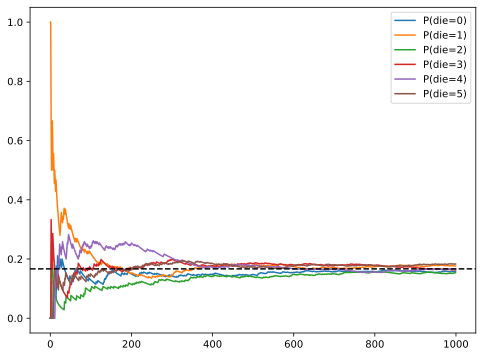

In [0]:
display.set_matplotlib_formats('svg')

plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(estimates[i, :].numpy(), label=("P(die=" + str(i) +")"))

plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()
plt.show()

Each solid curve corresponds to one of the six values of the die and gives our estimated probability that the die turns up that value as assessed after each of the 1000 turns. The dashed black line gives the true underlying probability. As we get more data, the solid curves converge towards the true answer.

In our example of casting a die, we introduced the notion of a **random variable**. A random variable, which we denote here as $X$ can be pretty much any quantity and is not deterministic. Random variables could take one value among a set of possibilities. We denote sets with brackets, e.g., $\{\mathrm{cat}, \mathrm{dog}, \mathrm{rabbit}\}$. The items contained in the set are called *elements*, and we can say that an element $x$ is *in* the set S, by writing $x \in S$. The symbol $\in$ is read as "in" and denotes membership. For instance, we could truthfully say $\mathrm{dog} \in \{\mathrm{cat}, \mathrm{dog}, \mathrm{rabbit}\}$. When dealing with the rolls of die, we are concerned with a variable $X \in \{1, 2, 3, 4, 5, 6\}$.

Note that there is a subtle difference between discrete random variables, like the sides of a dice, and continuous ones, like the weight and the height of a person. There's little point in asking whether two people have exactly the same height. If we take precise enough measurements you'll find that no two people on the planet have the exact same height. In fact, if we take a fine enough measurement, you will not have the same height when you wake up and when you go to sleep. So there's no purpose in asking about the probability
that someone is $2.00139278291028719210196740527486202$ meters tall. Given the world population of humans the probability is virtually 0. It makes more sense in this case to ask whether someone's height falls into a given interval, say between 1.99 and 2.01 meters. In these cases we quantify the likelihood that we see a value as a *density*. The height of exactly 2.0 meters has no probability, but nonzero density. In the interval between any two different heights we have nonzero probability.


There are a few important axioms of probability that you'll want to remember:

* For any event $z$, the probability is never negative, i.e. $\Pr(Z=z) \geq 0$.
* For any two events $Z=z$ and $X=x$ the union is no more likely than the sum of the individual events, i.e. $\Pr(Z=z \cup X=x) \leq \Pr(Z=z) + \Pr(X=x)$.
* For any random variable, the probabilities of all the values it can take must sum to 1, i.e. $\sum_{i=1}^n \Pr(Z=z_i) = 1$.
* For any two *mutually exclusive* events $Z=z$ and $X=x$, the probability that either happens is equal to the sum of their individual probabilities, that is $\Pr(Z=z \cup X=x) = \Pr(Z=z) + \Pr(X=x)$.

## Dealing with multiple random variables
Very often, we'll want to consider more than one random variable at a time.
For instance, we may want to model the relationship between diseases and symptoms. Given a disease and symptom, say 'flu' and 'cough', either may or may not occur in a patient with some probability. While we hope that the probability of both would be close to zero, we may want to estimate these probabilities and their relationships to each other so that we may apply our inferences to effect better medical care.

As a more complicated example, images contain millions of pixels, thus millions of random variables. And in many cases images will come with a
label, identifying objects in the image. We can also think of the label as a
random variable. We can even think of all the metadata as random variables
such as location, time, aperture, focal length, ISO, focus distance, camera type, etc. All of these are random variables that occur jointly. When we deal with multiple random variables, there are several quantities of interest. The first is called the joint distribution $\Pr(A, B)$. Given any elements $a$ and $b$, the joint distribution lets us answer, what is the probability that $A=a$ and $B=b$ simultaneously? Note that for any values $a$ and $b$, $\Pr(A=a,B=b) \leq \Pr(A=a)$.

This has to be the case, since for $A$ and $B$ to happen, $A$ has to happen *and* $B$ also has to happen (and vice versa). Thus $A,B$ cannot be more likely than $A$ or $B$ individually. This brings us to an interesting ratio: $0 \leq \frac{\Pr(A,B)}{\Pr(A)} \leq 1$. We call this a **conditional probability**
and denote it by $\Pr(B | A)$, the probability that $B$ happens, provided that
$A$ has happened.

Using the definition of conditional probabilities, we can derive one of the most useful and celebrated equations in statistics—Bayes' theorem.
It goes as follows: By construction, we have that $\Pr(A, B) = \Pr(B | A) \Pr(A)$. By symmetry, this also holds for $\Pr(A,B) = \Pr(A | B) \Pr(B)$. Solving for one of the conditional variables we get:

$$\Pr(A | B) = \frac{\Pr(B | A) \Pr(A)}{\Pr(B)}$$

This is very useful if we want to infer one thing from another, say cause and effect but we only know the properties in the reverse direction. One important operation that we need, to make this work, is **marginalization**, i.e., the operation of determining $\Pr(A)$ and $\Pr(B)$ from $\Pr(A,B)$. We can see that the probability of seeing $A$ amounts to accounting for all possible choices of $B$ and aggregating the joint probabilities over all of them, i.e.

$$\Pr(A) = \sum_{B'} \Pr(A,B') \text{ and
} \Pr(B) = \sum_{A'} \Pr(A',B)$$

Another useful property to check for is **dependence** vs. **independence**.
Independence is when the occurrence of one event does not reveal any information about the occurrence of the other. In this case $\Pr(B | A) = \Pr(B)$. Statisticians typically express this as $A \perp\!\!\!\perp B$. From Bayes' Theorem, it follows immediately that also $\Pr(A | B) = \Pr(A)$. In all other cases we call $A$ and $B$ dependent. For instance, two successive rolls of a die are independent. On the other hand, the position of a light switch and the brightness in the room are not (they are not perfectly deterministic, though, since we could always have a broken lightbulb, power failure, or a broken switch).

Let's put our skills to the test. Assume that a doctor administers an AIDS test to a patient. This test is fairly accurate and it fails only with 1% probability if the patient is healthy by reporting him as diseased. Moreover,
it never fails to detect HIV if the patient actually has it. We use $D$ to indicate the diagnosis and $H$ to denote the HIV status. Written as a table the outcome $\Pr(D | H)$ looks as follows:

|outcome| HIV positive | HIV negative |
|:------------|-------------:|-------------:|
|Test positive|            1 |         0.01 |
|Test negative|            0 |         0.99 |

Note that the column sums are all one (but the row sums aren't), since the conditional probability needs to sum up to $1$, just like the probability. Let us work out the probability of the patient having AIDS if the test comes back positive. Obviously this is going to depend on how common the disease is, since it affects the number of false alarms. Assume that the population is quite healthy, e.g. $\Pr(\text{HIV positive}) = 0.0015$. To apply Bayes' Theorem, we need to determine
$$\begin{aligned}
\Pr(\text{Test positive}) =& \Pr(D=1 | H=0) \Pr(H=0) + \Pr(D=1
| H=1) \Pr(H=1) \\
=& 0.01 \cdot 0.9985 + 1 \cdot 0.0015 \\
=& 0.011485
\end{aligned}
$$

Thus, we get

$$\begin{aligned} \Pr(H = 1 | D = 1) =& \frac{\Pr(D=1 | H=1) \Pr(H=1)}{\Pr(D=1)} \\ =& \frac{1 \cdot 0.0015}{0.011485} \\ =& 0.131 \end{aligned} $$

In other words, there's only a 13.1% chance that the patient actually has AIDS, despite using a test that is 99% accurate. As we can see, statistics can be quite counterintuitive.

## Conditional independence
What should a patient do upon receiving such terrifying news? Likely, he/she
would ask the physician to administer another test to get clarity. The second
test has different characteristics (it isn't as good as the first one).

|outcome |  HIV positive |  HIV negative |
|:------------|--------------:|--------------:|
|Test positive|          0.98 |          0.03 |
|Test negative|          0.02 |          0.97 |

Unfortunately, the second test comes back positive, too. Let us work out the requisite probabilities to invoke Bayes' Theorem.

* $\Pr(D_1 = 1 \text{ and } D_2 = 1 | H = 0) = 0.01 \cdot 0.03 = 0.0003$
* $\Pr(D_1 = 1 \text{ and } D_2 = 1 | H = 1) = 1 \cdot 0.98 = 0.98$
* $\Pr(D_1 = 1 \text{ and } D_2 = 1) = 0.0003 \cdot 0.9985 + 0.98 \cdot 0.0015 = 0.00176955$
* $\Pr(H = 1 | D_1 = 1 \text{ and } D_2 = 1) = \frac{0.98 \cdot 0.0015}{0.00176955} = 0.831$

That is, the second test allowed us to gain much higher confidence that not all is well. Despite the second test being considerably less accurate than the first one, it still improved our estimate quite a bit. You might ask, *why couldn't we just run the first test a second time?* After all, the first test was more accurate. The reason is that we needed a second test whose result is *independent* of the first test (given the true diagnosis). In other words, we made the tacit assumption that $\Pr(D_1, D_2 | H) = \Pr(D_1 | H) \Pr(D_2 | H)$. Statisticians call such random variables **conditionally independent**. This is expressed as $D_1 \perp\!\!\!\perp D_2  | H$.

## Sampling

Often, when working with probabilistic models, we'll want not just to estimate distributions from data, but also to generate data by sampling from distributions. One of the simplest ways to sample random numbers is to invoke the `random` method from Python's `random` package.

In [0]:
import random

for i in range(10):
    print(random.random())

0.8554122929305906
0.09984942684997111
0.8408226346312626
0.8582577512860254
0.7822457127645744
0.6308989453791197
0.82810688220893
0.7568218776211915
0.4908100936642287
0.5750730083951208


### Uniform Distribution

These numbers likely *appear* random. Note that their range is between 0 and 1 and they are evenly distributed. Because these numbers are generated by default from the uniform distribution, there should be no two sub-intervals of $[0,1]$ of equal size where numbers are more likely to lie in one interval than the other. In other words, the chances of any of these numbers to fall into the interval $[0.2,0.3)$ are the same as in the interval $[.593264, .693264)$. In fact, these numbers are pseudo-random, and the computer generates them by first producing a random integer and then dividing it by its maximum range. To sample random integers directly, we can run the following snippet, which generates integers in the range between 1 and 100.

In [0]:
for i in range(10):
    print(random.randint(1, 100))

100
42
28
13
38
29
26
34
36
84


How might we check that ``randint`` is really uniform? Intuitively, the best
strategy would be to run sampler many times, say 1 million, and then count the
number of times it generates each value to ensure that the results are approximately uniform.

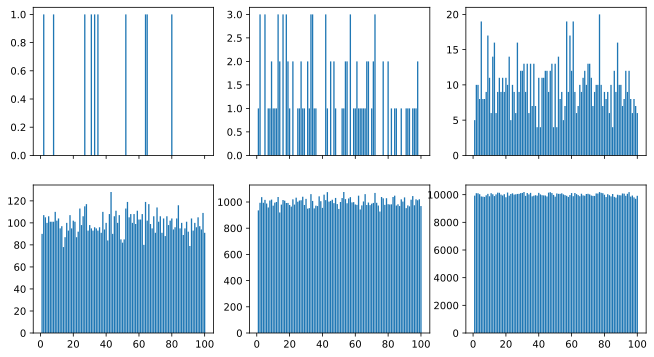

In [0]:
import math

counts = np.zeros(100)
fig, axes = plt.subplots(2, 3, figsize=(11, 6), sharex=True)
axes = axes.reshape(6)

# Mangle subplots such that we can index them in a linear fashion rather than
# a 2D grid

for i in range(1, 1000001):
    counts[random.randint(0, 99)] += 1
    if i in [10, 100, 1000, 10000, 100000, 1000000]:
        axes[int(math.log10(i))-1].bar(np.arange(1, 101), counts)
plt.show()

We can see from these figures that the initial number of counts looks *strikingly* uneven. If we sample fewer than 100 draws from a distribution over
100 outcomes this should be expected. But even for 1000 samples there is a
significant variability between the draws. What we are really aiming for is a
situation where the probability of drawing a number $x$ is given by $p(x)$.

### The categorical distribution

Drawing from a uniform distribution over a set of 100 outcomes is simple. But what if we have nonuniform probabilities? Let's start with a simple case, a biased coin which comes up heads with probability 0.35 and tails with probability 0.65. A simple way to sample from that is to generate a uniform random variable over $[0,1]$ and if the number is less than $0.35$, we output heads and otherwise we generate tails. Let's try this out.

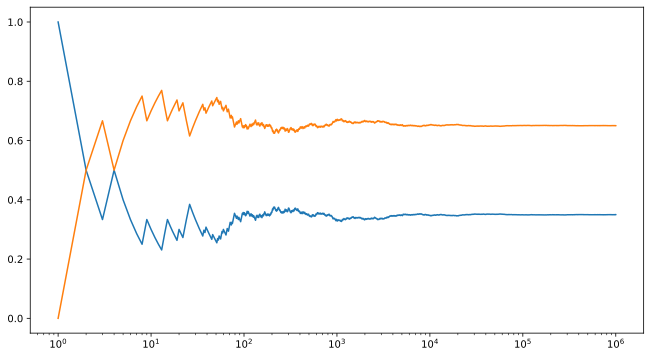

In [0]:
# Number of samples
n = 1000000
y = np.random.uniform(0, 1, n)
x = np.arange(1, n+1)
# Count number of occurrences and divide by the number of total draws
p0 = np.cumsum(y < 0.35) / x
p1 = np.cumsum(y >= 0.35) / x

plt.figure(figsize=(11, 6))
plt.semilogx(x, p0)
plt.semilogx(x, p1)
plt.show()

As we can see, on average, this sampler will generate 35% zeros and 65% ones.
Now what if we have more than two possible outcomes? We can simply generalize
this idea as follows. Given any probability distribution, e.g. $p = [0.1, 0.2, 0.05, 0.3, 0.25, 0.1]$ we can compute its cumulative distribution (python's ``cumsum`` will do this for you) $F = [0.1, 0.3, 0.35, 0.65, 0.9, 1]$. Once we have this we draw a random variable $x$ from the uniform distribution $U[0,1]$ and then find the interval where $F[i-1] \leq x < F[i]$. We then return $i$ as the sample. By construction, the chances of hitting interval $[F[i-1], F[i])$ has probability $p(i)$.

Note that there are many more efficient algorithms for sampling than the one above. For instance, binary search over $F$ will run in $O(\log n)$ time for $n$ random variables. There are even more clever algorithms, such as the [Alias
Method](https://en.wikipedia.org/wiki/Alias_method) to sample in constant time,
after $O(n)$ preprocessing.

### The Normal distribution

The standard Normal distribution (aka the standard Gaussian distribution) is given by $p(x) = \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{1}{2} x^2\right)$. Let's plot it to get a feel for it.

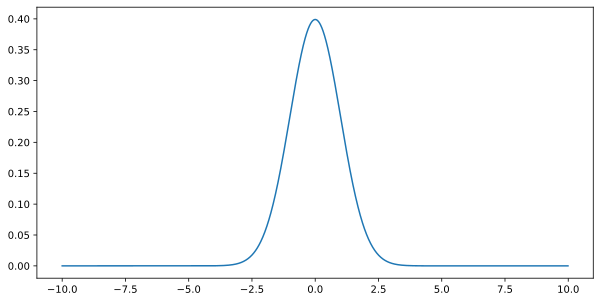

In [0]:
x = np.arange(-10, 10, 0.01)
p = (1/math.sqrt(2 * math.pi)) * np.exp(-0.5 * x**2)
plt.figure(figsize=(10, 5))
plt.plot(x, p)
plt.show()

Sampling from this distribution is less trivial. First off, the support is
infinite, that is, for any $x$ the density $p(x)$ is positive. Secondly, the
density is nonuniform. There are many tricks for sampling from it - the key idea in all algorithms is to stratify $p(x)$ in such a way as to map it to the
uniform distribution $U[0,1]$. One way to do this is with the probability
integral transform.

Denote by $F(x) = \int_{-\infty}^x p(z) dz$ the cumulative distribution function (CDF) of $p$. This is in a way the continuous version of the cumulative sum that we used previously. In the same way we can now define the inverse map $F^{-1}(\xi)$, where $\xi$ is drawn uniformly. Unlike previously where we needed to find the correct interval for the vector $F$ (i.e. for the piecewise constant function), we now invert the function $F(x)$.

In practice, this is slightly more tricky since inverting the CDF is hard in the case of a Gaussian. It turns out that the *twodimensional* integral is much easier to deal with, thus yielding two normal random variables than one, albeit at the price of two uniformly distributed ones. For now, suffice it to say that there are built-in algorithms to address this.

The normal distribution has yet another desirable property. In a way all distributions converge to it, if we only average over a sufficiently large number of draws from any other distribution. To understand this in a bit more detail, we need to introduce three important things: expected values, means and variances.

* The expected value $\mathbf{E}_{x \sim p(x)}[f(x)]$ of a function $f$ under a distribution $p$ is given by the integral $\int_x p(x) f(x) dx$. That is, we average over all possible outcomes, as given by $p$.
* A particularly important expected value is
that for the function $f(x) = x$, i.e. $\mu := \mathbf{E}_{x \sim p(x)}[x]$. It
provides us with some idea about the typical values of $x$.
* Another important quantity is the variance, i.e. the typical deviation from the mean $\sigma^2 := \mathbf{E}_{x \sim p(x)}[(x-\mu)^2]$. Simple math shows (check it as an exercise) that $\sigma^2 = \mathbf{E}_{x \sim p(x)}[x^2] - \mathbf{E}^2_{x \sim p(x)}[x]$.

The above allows us to change both mean and variance of random variables. Quite obviously for some random variable $x$ with mean $\mu$, the random variable $x + c$ has mean $\mu + c$. Moreover, $\gamma x$ has the variance $\gamma^2 \sigma^2$. Applying this to the normal distribution we see that one with mean $\mu$ and variance $\sigma^2$ has the form $p(x) = \frac{1}{\sqrt{2 \sigma^2 \pi}} \exp\left(-\frac{1}{2 \sigma^2} (x-\mu)^2\right)$. Note the scaling factor $\frac{1}{\sigma}$—it arises from the fact that if we stretch the distribution by $\sigma$, we need to lower it by $\frac{1}{\sigma}$ to retain the same probability mass (i.e. the weight under the distribution always needs to integrate out to 1).

Now we are ready to state one of the most fundamental theorems in statistics, the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). It states that for sufficiently well-behaved random variables, in particular random variables with well-defined mean and variance, the sum tends toward a normal distribution. To get some idea, let's repeat the experiment described in the beginning, but now using random variables with integer values of $\{0, 1, 2\}$.

mean 0.9, variance 0.49


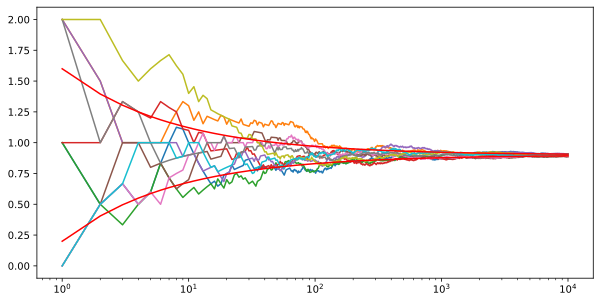

In [0]:
# Generate 10 random sequences of 10,000 uniformly distributed random variables
tmp = np.random.uniform(size=(10000,10))
x = 1.0 * (tmp > 0.3) + 1.0 * (tmp > 0.8)
mean = 1 * 0.5 + 2 * 0.2
variance = 1 * 0.5 + 4 * 0.2 - mean**2
print('mean {}, variance {}'.format(mean, variance))

# Cumulative sum and normalization
y = np.arange(1,10001).reshape(10000,1)
z = np.cumsum(x,axis=0) / y

plt.figure(figsize=(10,5))
for i in range(10):
    plt.semilogx(y,z[:,i])

plt.semilogx(y,(variance**0.5) * np.power(y,-0.5) + mean,'r')
plt.semilogx(y,-(variance**0.5) * np.power(y,-0.5) + mean,'r')
plt.show()

This looks very similar to the initial example, at least in the limit of averages of large numbers of variables. This is confirmed by theory. Denote by
mean and variance of a random variable the quantities

$$\mu[p] := \mathbf{E}_{x \sim p(x)}[x] \text{ and } \sigma^2[p] := \mathbf{E}_{x \sim p(x)}[(x - \mu[p])^2]$$

Then we have that $\lim_{n\to \infty} \frac{1}{\sqrt{n}} \sum_{i=1}^n \frac{x_i - \mu}{\sigma} \to \mathcal{N}(0, 1)$. In other words, regardless of what we started out with, we will always converge to a Gaussian. This is one of the reasons why Gaussians are so popular in statistics.


### More distributions

Many more useful distributions exist. If you're interested in going deeper, we recommend consulting a dedicated book on statistics or looking up some common distributions on Wikipedia for further detail. Some important distirbutions to be aware of include:

* **Binomial Distribution** It is used to describe the distribution over multiple draws from the same distribution, e.g. the number of heads when tossing a biased coin (i.e. a coin with probability $\pi \in [0, 1]$ of returning heads) 10 times. The binomial probability is given by $p(x) = {n \choose x} \pi^x (1-\pi)^{n-x}$.
* **Multinomial Distribution** Often, we are concerned with more than two
outcomes, e.g. when rolling a dice multiple times. In this case, the
distribution is given by $p(x) = \frac{n!}{\prod_{i=1}^k x_i!} \prod_{i=1}^k \pi_i^{x_i}$.
* **Poisson Distribution** This distribution models the occurrence of point events that happen with a given rate, e.g. the number of raindrops arriving within a given amount of time in an area (weird fact - the number of Prussian soldiers being killed by horses kicking them followed that distribution). Given a rate $\lambda$, the number of occurrences is given by $p(x) = \frac{1}{x!} \lambda^x e^{-\lambda}$.
* **Beta, Dirichlet, Gamma, and Wishart Distributions** They are what statisticians call *conjugate* to the Binomial, Multinomial, Poisson and Gaussian respectively. Without going into detail, these distributions are often used as priors for coefficients of the latter set of distributions, e.g. a Beta distribution as a prior for modeling the probability for binomial outcomes.



## Summary

So far, we covered probabilities, independence, conditional independence, and how to use this to draw some basic conclusions. We also introduced some fundamental probability distributions and demonstrated how to sample from them using PyTorch. This is already a powerful bit of knowledge, and by itself a sufficient set of tools for developing some classic machine learning models. In the next section, we will see how to operationalize this knowlege to build your first machine learning model: the Naive Bayes classifier.



**Exercise:** Implement a function that returns the binomial distribution, which describes the number of times we toss a coin (n), each toss is for a fair unbiased coin (p).

In [0]:
def binomial(n, p=0.5):
  ## 
  return torch.distributions.Binomial(n,p)
  ## end of function

#binomial(10000).sample()

# Automatic Differentiation


The autograd package expedites this work by automatically calculating derivatives. And while many other libraries require that we compile a symbolic graph to take automatic derivatives, `autograd` allows us to take derivatives while writing  ordinary imperative code. Every time we pass data through our model, `autograd` builds a graph on the fly, tracking which data combined through which operations to produce the output. This graph enables `autograd` to subsequently backpropagate gradients on command. Here *backpropagate* simply means to trace through the compute graph, filling in the partial derivatives with respect to each parameter.

In [0]:
import torch
from torch.autograd import Variable

## A Simple Example

As a toy example, say that we are interested in differentiating the mapping $y = 2\mathbf{x}^{\top}\mathbf{x}$ with respect to the column vector $\mathbf{x}$. To start, let's create the variable `x` and assign it an initial value.

In [0]:
x = Variable(torch.arange(4, dtype=torch.float32).reshape((4, 1)), requires_grad=True)
print(x)

tensor([[0.],
        [1.],
        [2.],
        [3.]], requires_grad=True)


Once we compute the gradient of ``y`` with respect to ``x``, we will need a place to store it. We can tell a tensor that we plan to store a gradient by the ``requires_grad=True`` keyword.

Now we are going to compute ``y`` and PyTorch will generate a computation graph on the fly. Autograd is reverse automatic differentiation system. Conceptually, autograd records a graph recording all of the operations that created the data as you execute operations, giving you a directed acyclic graph whose leaves are the input tensors and roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.

Note that building the computation graph requires a nontrivial amount of computation. So PyTorch will *only* build the graph when explicitly told to do so. For a tensor to be “recordable”, it must be wrapped with torch.autograd.Variable. The Variable class provides almost the same API as Tensor, but augments it with the ability to interplay with torch.autograd.Function in order to be differentiated automatically. More precisely, a Variable records the history of operations on a Tensor.

In [0]:
y = 2*torch.mm(x.t(),x)
print(y)

tensor([[28.]], grad_fn=<MulBackward0>)


Since the shape of `x` is (4, 1), `y` is a scalar. Next, we can automatically find the gradient by calling the `backward` function. It should be noted that if `y` is not a scalar, PyTorch will first sum the elements in `y` to get the new variable by default, and then find the gradient of the variable with respect to `x`.

In [0]:
y.backward()

Since every Variable except for inputs is the result of an operation, each Variable has an associated grad_fn, which is the torch.autograd.Function that is used to compute the backward step. For inputs it is None:

In [0]:
print("x.grad:", x.grad)
print("x.grad_fn:", x.grad_fn)
print("y.grad_fn:", y.grad_fn)

x.grad: tensor([[ 0.],
        [ 4.],
        [ 8.],
        [12.]])
x.grad_fn: None
y.grad_fn: <MulBackward0 object at 0x7f16dc27e048>


The gradient of the function $y = 2\mathbf{x}^{\top}\mathbf{x}$ with respect to $\mathbf{x}$ should be $4\mathbf{x}$. Now let's verify that the gradient produced is correct.

In [0]:
print((x.grad - 4*x).norm().item() == 0)
print(x.grad)

True
tensor([[ 0.],
        [ 4.],
        [ 8.],
        [12.]])


## Training Mode and Evaluation Mode

`Model` will change the running mode to the evaluation mode on calling `model.eval()` or to the training mode on calling `model.train()`.

In some cases, the same model behaves differently in the training and prediction modes (e.g. when using neural techniques such as dropout and batch normalization). In other cases, some models may store more auxiliary variables to make computing gradients easier. We will cover these differences in detail in later chapters. For now, you do not need to worry about them.

## Computing the Gradient of Python Control Flow

One benefit of using automatic differentiation is that even if the computational graph of the function contains Python's control flow (such as conditional and loop control), we may still be able to find the gradient of a variable. Consider the following program:  It should be emphasized that the number of iterations of the loop (while loop) and the execution of the conditional judgment (if statement) depend on the value of the input `b`.

In [0]:
def f(a):
    b = a * 2
    while b.norm().item() < 1000:
        b = b * 2
    if b.sum().item() > 0:
        c = b
    else:
        c = 100 * b
    return c

Note that the number of iterations of the while loop and the execution of the conditional statement (if then else) depend on the value of `a`. To compute gradients, we need to `record` the calculation, and then call the `backward` function to calculate the gradient.

In [0]:
a = torch.randn(size=(1,))
a.requires_grad=True
d = f(a)
d.backward()

Let's analyze the `f` function defined above. As you can see, it is piecewise linear in its input `a`. In other words, for any `a` there exists some constant such that for a given range `f(a) = g * a`. Consequently `d / a` allows us to verify that the gradient is correct:

In [0]:
print(a.grad == (d / a)) #?

tensor([True])


## Summary

* PyTorch provides an `autograd` package to automate the derivation process.
* PyTorch's `autograd` package can be used to derive general imperative programs.
* The running modes of PyTorch include the training mode and the evaluation mode.

# Naive Bayes Classification

Before we worry about complex optimization algorithms or GPUs, we can already deploy our first classifier, relying only on simple statistical estimators and our understanding of conditional independence. Learning is all about making assumptions. If we want to classify a new data point that we've never seen before we have to make some assumptions about which data points are *similar* to each other.

One popular (and remarkably simple) algorithm is the Naive Bayes Classifier. Note that one natural way to express the classification task is via the probabilistic question: *what is the most likely label given the features?*. Formally, we wish to output the prediction $\hat{y}$ given by the expression:

$$\hat{y} = \text{argmax}_y \> p(y | \mathbf{x})$$

Unfortunately, this requires that we estimate $p(y | \mathbf{x})$ for every value of $\mathbf{x} = x_1, ..., x_d$. Imagine that each feature could take one of $2$ values. For example, the feature $x_1 = 1$ might signify that the word apple appears in a given document and $x_1 = 0$ would signify that it does not. If we had $30$ such binary features, that would mean that we need to be prepared to classify any of $2^{30}$ (over 1 billion!) possible values of the input vector $\mathbf{x}$.

Moreover, where is the learning? If we need to see every single possible example in order to predict the corresponding label then we're not really learning a pattern but just memorizing the dataset. Fortunately, by making some assumptions about conditional independence, we can introduce some inductive bias and build a model capable of generalizing from a comparatively modest selection of training examples.

To begin, let's use Bayes Theorem, to express the classifier as

$$\hat{y} = \text{argmax}_y \> \frac{p( \mathbf{x} | y) p(y)}{p(\mathbf{x})}$$

Note that the denominator is the normalizing term $p(\mathbf{x})$ which does not depend on the value of the label $y$. As a result, we only need to worry about comparing the numerator across different values of $y$. Even if calculating the demoninator turned out to be intractable, we could get away with ignoring it, so long as we could evaluate the numerator. Fortunately, however, even if we wanted to recover the normalizing constant, we could, since we know that $\sum_y p(y | \mathbf{x}) = 1$, hence we can always recover the normalization term.
Now, using the chain rule of probability, we can express the term $p( \mathbf{x} | y)$ as

$$p(x_1 |y) \cdot p(x_2 | x_1, y) \cdot ... \cdot p( x_d | x_1, ..., x_{d-1} y)$$

By itself, this expression doesn't get us any further. We still must estimate roughly $2^d$ parameters. However, if we assume that ***the features are conditionally independent of each other, given the label***, then suddenly we're in much better shape, as this term simplifies to $\prod_i p(x_i | y)$, giving us the predictor

$$ \hat{y} = \text{argmax}_y \> = \prod_i p(x_i | y) p(y)$$

Estimating each term in $\prod_i p(x_i | y)$ amounts to estimating just one parameter. So our assumption of conditional independence has taken the complexity of our model (in terms of the number of parameters) from an exponential dependence on the number of features to a linear dependence. Moreover, we can now make predictions for examples that we've never seen before, because we just need to estimate the terms $p(x_i | y)$, which can be estimated based on a number of different documents.

Let's take a closer look at the key assumption that the attributes are all independent of each other, given the labels, i.e., $p(\mathbf{x} | y) = \prod_i p(x_i | y)$. Consider classifying emails into spam and ham. It's fair to say that the occurrence of the words `Nigeria`, `prince`, `money`, `rich` are all likely indicators that the e-mail might be spam, whereas `theorem`, `network`, `Bayes` or `statistics` are good indicators that the exchange is less likely to be part of an orchestrated attempt to wheedle out your bank account numbers. Thus, we could model the probability of occurrence for each of these words, given the respective class and then use it to score the likelihood of a text. In fact, for a long time this *is* preciely how many so-called [Bayesian spam filters](https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering) worked.

## Optical Character Recognition

Since images are much easier to deal with, we will illustrate the workings of a Naive Bayes classifier for distinguishing digits on the MNIST dataset. The problem is that we don't actually know $p(y)$ and $p(x_i | y)$. So we need to *estimate* it given some training data first. This is what is called *training* the model. Estimating $p(y)$ is not too hard. Since we are only dealing with 10 classes, this is pretty easy - simply count the number of occurrences $n_y$ for each of the digits and divide it by the total amount of data $n$. For instance, if digit 8 occurs $n_8 = 5,800$ times and we have a total of $n = 60,000$ images, the probability estimate is $p(y=8) = 0.0967$.

Now on to slightly more difficult things—$p(x_i | y)$. Since we picked black and white images, $p(x_i | y)$ denotes the probability that pixel $i$ is switched on for class $y$. Just like before we can go and count the number of times $n_{iy}$ such that an event occurs and divide it by the total number of occurrences of y, i.e. $n_y$. But there's something slightly troubling: certain pixels may never be black (e.g. for very well cropped images the corner pixels might always be white). A convenient way for statisticians to deal with this problem is to add pseudo counts to all occurrences. Hence, rather than $n_{iy}$ we use $n_{iy}+1$ and instead of $n_y$ we use $n_{y} + 1$. This is also called [Laplace Smoothing](https://en.wikipedia.org/wiki/Additive_smoothing).

In [0]:
%matplotlib inline
import tqdm
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import torch
from torch import tensor
from torchvision import transforms, datasets

data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor(), transforms.Normalize(mean=[0],std=[1])])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=data_transform)
mnist_test  = datasets.MNIST(root='./data', train=False, download=True, transform=data_transform)

# Initialize the counters
xcount = torch.ones((784,10), dtype=torch.float32)
ycount = torch.ones((10), dtype=torch.float32)

for data, label in mnist_train:
    y = int(label)
    ycount[y] += 1
    xcount[:,y] += data.reshape((784))

# using broadcast again for division
py = ycount / ycount.sum()
px = (xcount / ycount.reshape(1,10))

In [0]:
for data, label in mnist_train:
    y = int(label)
    ycount[y] += 1
    xcount[:,y] += data.reshape((784))

Now that we computed per-pixel counts of occurrence for all pixels, it's time to see how our model behaves. Time to plot it. This is where it is so much more convenient to work with images. Visualizing 28x28x10 probabilities (for each pixel for each class) would typically be an exercise in futility. However, by plotting them as images we get a quick overview. The astute reader probably noticed by now that these are some mean looking digits ...

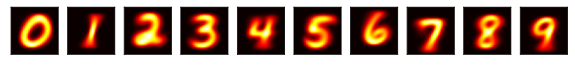

Class probabilities tensor([0.0987, 0.1124, 0.0993, 0.1022, 0.0974, 0.0904, 0.0986, 0.1044, 0.0975,
        0.0992])


In [0]:
import matplotlib.pyplot as plt
fig, figarr = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    figarr[i].imshow(xcount[:, i].reshape((28, 28)).numpy(), cmap='hot')
    figarr[i].axes.get_xaxis().set_visible(False)
    figarr[i].axes.get_yaxis().set_visible(False)

plt.show()
print('Class probabilities', py)

Now we can compute the likelihoods of an image, given the model. This is statistician speak for $p(x | y)$, i.e. how likely it is to see a particular image under certain conditions (such as the label). Our Naive Bayes model which assumed that all pixels are independent tells us that

$$p(\mathbf{x} | y) = \prod_{i} p(x_i | y)$$

Using Bayes' rule, we can thus compute $p(y | \mathbf{x})$ via

$$p(y | \mathbf{x}) = \frac{p(\mathbf{x} | y) p(y)}{\sum_{y'} p(\mathbf{x} | y')}$$

Let's try this ...

In [0]:
# Get the first test item
data, label = mnist_test[0]
#print(data)
#print(mnist_test[0])
data = data.reshape((784,1))

# Compute the per pixel conditional probabilities
xprob = (px * data + (1-px) * (1-data))
# Take the product
xprob = xprob.prod(0) * py
print('Unnormalized Probabilities', xprob)
# Normalize
xprob = xprob / xprob.sum()
print('Normalized Probabilities', xprob)

Unnormalized Probabilities tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Normalized Probabilities tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])


This went horribly wrong! To find out why, let's look at the per pixel probabilities. They're typically numbers between $0.001$ and $1$. We are multiplying $784$ of them. At this point it is worth mentioning that we are calculating these numbers on a computer, hence with a fixed range for the exponent. What happens is that we experience *numerical underflow*, i.e. multiplying all the small numbers leads to something even smaller until it is rounded down to zero. At that point we get division by zero with `nan` as a result.

To fix this we use the fact that $\log a b = \log a + \log b$, i.e. we switch to summing logarithms. This will get us unnormalized probabilities in log-space. To normalize terms we use the fact that

$$\frac{\exp(a)}{\exp(a) + \exp(b)} = \frac{\exp(a + c)}{\exp(a + c) + \exp(b + c)}$$

In particular, we can pick $c = -\max(a,b)$, which ensures that at least one of the terms in the denominator is $1$.

[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4012985e-45 2.6946839e-35
 3.5602790e-41 0.0000000e+00 1.0000000e+00 0.0000000e+00 4.1843323e-22]
7
7
[2.6210335e-39 0.0000000e+00 1.0000000e+00 8.5231863e-18 0.0000000e+00
 5.0428198e-23 4.4513927e-16 0.0000000e+00 1.3847901e-33 0.0000000e+00]
2
2
[0.0000000e+00 1.0000000e+00 2.9467905e-41 5.1567783e-43 1.8216880e-44
 4.2142535e-38 1.4012985e-45 1.8216880e-44 1.8400450e-41 7.9874012e-44]
1
1
[1.0000000e+00 0.0000000e+00 1.7838529e-42 4.4841551e-44 0.0000000e+00
 1.2059714e-32 1.0388112e-25 0.0000000e+00 6.7570612e-42 0.0000000e+00]
0
0
[1.3460873e-39 0.0000000e+00 4.3531332e-26 1.0494990e-38 1.0000000e+00
 2.7448075e-25 3.1379643e-29 5.1293946e-21 2.5896528e-28 5.0065854e-11]
4
4
[0.000000e+00 1.000000e+00 2.242078e-44 1.429324e-43 0.000000e+00
 1.135472e-41 0.000000e+00 7.328791e-43 4.748832e-39 4.711165e-42]
1
1
[0.00000000e+00 0.00000000e+00 3.56836291e-36 8.12145555e-22
 1.00000000e+00 8.77616935e-13 2.88373211e-41 1.58095997e-12
 3.739

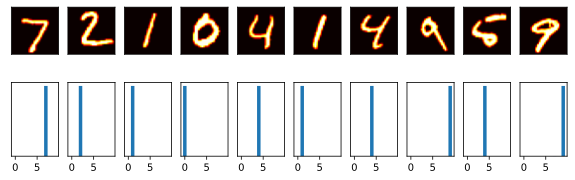

In [0]:
logpx = torch.log(px)
logpxneg = torch.log(1-px)
logpy = torch.log(py)

def bayespost(data):
    
    # We need to incorporate the prior probability p(y) since p(y|x) is
    # proportional to p(x|y) p(y)
    logpost = logpy.clone()
    logpost += (logpx * data + logpxneg * (1-data)).sum(0)
    # Normalize to prevent overflow or underflow by subtracting the largest
    # value
    logpost -= torch.max(logpost)
    # Compute the softmax using logpx
    post = torch.exp(logpost).numpy()
    post /= np.sum(post)
    #print(post)
    return post

fig, figarr = plt.subplots(2, 10, figsize=(10, 3))

# Show 10 images
ctr = 0
for data, label in mnist_test:
    x = data.reshape((784,1))
    y = int(label)

    post = bayespost(x)
    #print(post)
    #print(post.argmax( axis=0) )
    #print(y)
    # Bar chart and image of digit
    figarr[1, ctr].bar(range(10), post)
    figarr[1, ctr].axes.get_yaxis().set_visible(False)
    figarr[0, ctr].imshow(x.reshape((28, 28)).numpy(), cmap='hot')
    figarr[0, ctr].axes.get_xaxis().set_visible(False)
    figarr[0, ctr].axes.get_yaxis().set_visible(False)
    ctr += 1

    if ctr == 10:
        break

plt.show()

**Exercise:** As we can see, this classifier works pretty well in many cases. However, the second last digit shows that it can be both incompetent and overly confident of its incorrect estimates. That is, even if it is horribly wrong, it generates probabilities close to 1 or 0. Not a classifier we should use very much nowadays any longer. To see how well it performs overall, let's compute the overall accuracy of the classifier. Write a function that computes the accuracy of the above naive bayes classifier on MNIST test set. *HINT: utilize the `bayespost` function from above.*

In [0]:
def accuracy_NB(mnist_test):
  acc = 0.00000
  ## write your code here
  #X , y = mnist_test[:] #grab all data
  preds = torch.zeros(10000, dtype=torch.float64).reshape(10000,1)
  gt =  torch.zeros(10000, dtype=torch.float64).reshape(10000,1)
  i =0
  for data, label in mnist_test:
      #print(data)
      x = data.reshape((784,1))
      y = int(label)
      #print(y)
      #print(bayespost(x).argmax(axis=0))
      preds[i] =bayespost(x).argmax(axis=0)
      gt[i] = y
      i= i+1
  #print((preds == gt).sum().item())
  #print(len(gt))
  acc = (float(((preds == gt).sum().item())/ len(gt)))
  ## end of function
  return acc


#accuracy_NB(mnist_test)


0.8447

Modern deep networks achieve error rates of less than 0.01. While Naive Bayes classifiers used to be popular in the 80s and 90s, e.g. for spam filtering, their heydays are over. The poor performance is due to the incorrect statistical assumptions that we made in our model: we assumed that each and every pixel are *independently* generated, depending only on the label. This is clearly not how humans write digits, and this wrong assumption led to the downfall of our overly naive (Bayes) classifier. Time to start building Deep Networks.

## Summary

* Naive Bayes is an easy to use classifier that uses the assumption
  $p(\mathbf{x} | y) = \prod_i p(x_i | y)$.
* The classifier is easy to train but its estimates can be very wrong.
* To address overly confident and nonsensical estimates, the
  probabilities $p(x_i|y)$ are smoothed, e.g. by Laplace
  smoothing. That is, we add a constant to all counts.
* Naive Bayes classifiers don't exploit any correlations between
  observations.